In [1]:
import pandas as pd
import numpy as np
from itertools import combinations
from upsetplot import plot, from_memberships, generate_counts

In [2]:
generate_counts()

cat0   cat1   cat2 
False  False  False      56
              True      283
       True   False    1279
              True     5882
True   False  False      24
              True       90
       True   False     429
              True     1957
Name: value, dtype: int64

In [2]:
df = pd.read_csv('../materials/processed_df_new.csv')

In [5]:
pd.options.display.max_columns = None

In [6]:
df[(df["SVI RP"] == 1 ) & (df["N +"] == 1) & (df["EPE micro"] + df["EPE macro"] == 0)]

,ID,wiek,PSA,PSAdensity,MRI vol,MRI Pirads,MRI EPE,MRI EPE L,MRI EPE P,MRI SVI,MRI SVI L,MRI SVI P,MRI SIZE,Bx ISUP Grade P,Bx ISUP Grade L,ISUP RP,ISUP RP P,ISUP RP L,SM +,N +,EPE RP,EPE L RP,EPE P RP,SVI RP,SVI RP L,SVI RP P,TNM,EPE micro,EPE macro,EPE false_positive,Bx ISUP Grade
76,ID00078,63.0,34.0,1.062500,32.0,5.0,1.0,0.0,1.0,1.0,0.0,1.0,26.0,2,2.0,4.0,4.0,4.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,t3b,0.0,0.0,1.0,2.0
103,ID00105,71.0,12.9,0.403125,32.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,3,0.0,4.0,4.0,4.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,t3b,0.0,0.0,0.0,3.0
384,ID00395,66.0,13.1,0.225862,58.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,2,0.0,4.0,4.0,4.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,t3b,0.0,0.0,0.0,2.0


In [3]:
cols = ["EPE micro", "EPE macro", "SVI RP", "N +"]

In [18]:
none_count = np.sum((df[cols[0]] == 0) & (df[cols[1]] == 0) & (df[cols[2]] == 0) & (df[cols[3]] == 0))

epe_micro_count = np.sum(df[cols[0]] == 1)
epe_macro_count = np.sum(df[cols[1]] == 1)
svi_rp_count = np.sum(df[cols[2]] == 1)
n_plus_count = np.sum(df[cols[3]] == 1)

epe_micro_epe_macro_count = np.sum((df[cols[0]] == 1) & (df[cols[1]] == 1))
epe_micro_svi_rp_count = np.sum((df[cols[0]] == 1) & (df[cols[2]] == 1))
epe_micro_n_plus_count = np.sum((df[cols[0]] == 1) & (df[cols[3]] == 1))

epe_macro_svi_rp_count = np.sum((df[cols[1]] == 1) & (df[cols[2]] == 1))
epe_macro_n_plus_count = np.sum((df[cols[1]] == 1) & (df[cols[3]] == 1))
svi_rp_n_plus_count = np.sum((df[cols[2]] == 1) & (df[cols[3]] == 1))

epe_micro_epe_macro_svi_rp_count = np.sum((df[cols[0]] == 1) & (df[cols[1]] == 1) & (df[cols[2]] == 1))
epe_micro_epe_macro_n_plus_count = np.sum((df[cols[0]] == 1) & (df[cols[1]] == 1) & (df[cols[3]] == 1))
epe_micro_svi_rp_n_plus_count = np.sum((df[cols[0]] == 1) & (df[cols[2]] == 1) & (df[cols[3]] == 1))
epe_macro_svi_rp_n_plus_count = np.sum((df[cols[1]] == 1) & (df[cols[2]] == 1) & (df[cols[3]] == 1))

all_count = np.sum((df[cols[0]] == 1) & (df[cols[1]] == 1) & (df[cols[2]] == 1) & (df[cols[3]] == 1))

In [23]:
ordered_counts = [
    none_count,
    n_plus_count,
    svi_rp_count,
    svi_rp_n_plus_count,
    epe_macro_count,
    epe_macro_n_plus_count,
    epe_macro_svi_rp_count,
    epe_macro_svi_rp_n_plus_count,
    epe_micro_count,
    epe_micro_n_plus_count,
    epe_micro_svi_rp_count,
    epe_micro_svi_rp_n_plus_count,
    epe_micro_epe_macro_count,
    epe_micro_epe_macro_n_plus_count,
    epe_micro_epe_macro_svi_rp_count,
    all_count
]

In [22]:
tuples = []
for i in range(2**len(cols)):
    mask = bin(i)[2:].zfill(len(cols))
    t = tuple(m=='1' for m in mask)
    tuples.append(t)
    
index = pd.MultiIndex.from_tuples(tuples, names=cols)
index

MultiIndex([(False, False, False, False),
            (False, False, False,  True),
            (False, False,  True, False),
            (False, False,  True,  True),
            (False,  True, False, False),
            (False,  True, False,  True),
            (False,  True,  True, False),
            (False,  True,  True,  True),
            ( True, False, False, False),
            ( True, False, False,  True),
            ( True, False,  True, False),
            ( True, False,  True,  True),
            ( True,  True, False, False),
            ( True,  True, False,  True),
            ( True,  True,  True, False),
            ( True,  True,  True,  True)],
           names=['EPE micro', 'EPE macro', 'SVI RP', 'N +'])

In [26]:
memberships = pd.Series(ordered_counts, index=index)
memberships

EPE micro  EPE macro  SVI RP  N +  
False      False      False   False    264
                              True      38
                      True    False     51
                              True      25
           True       False   False     38
                              True      17
                      True    False     23
                              True      15
True       False      False   False     93
                              True      15
                      True    False     22
                              True       7
           True       False   False      0
                              True       0
                      True    False      0
                              True       0
dtype: int64

/home/np/PUT/V semester/AI/microscopic-epe-proj/.venv/lib/python3.13/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/home/np/PUT/V semester/AI/microscopic-epe-proj/.venv/lib/python3.13/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the inte

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

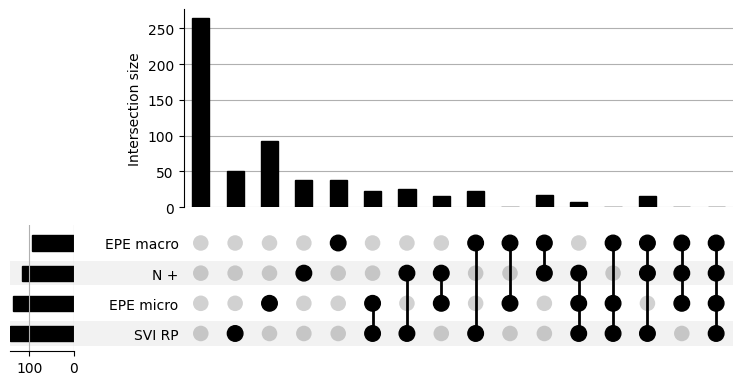

In [38]:
plot(memberships)

<Axes: >

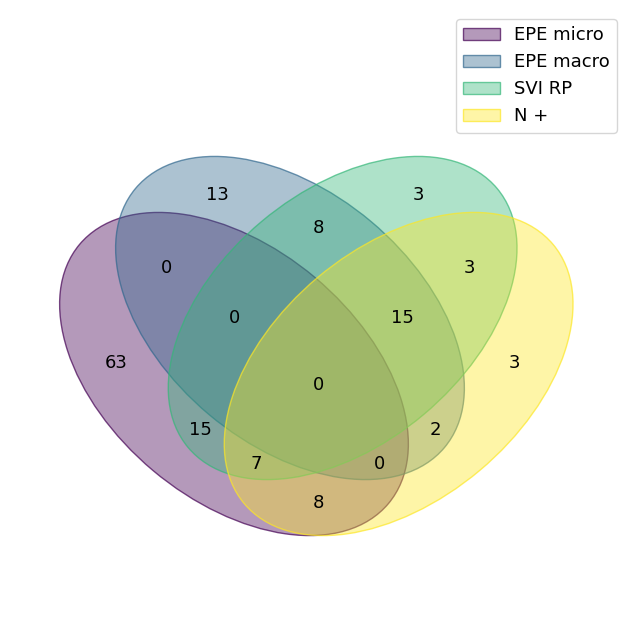

In [23]:
from venn import venn
venn_data = {
    "EPE micro": set(df.index[df["EPE micro"] == 1]),
    "EPE macro": set(df.index[df["EPE macro"] == 1]),
    "SVI RP": set(df.index[df["SVI RP"] == 1]),
    "N +": set(df.index[df["N +"] == 1])
}
venn(venn_data)